# **BERT Implementation**

In [0]:
pip install flair

In [0]:
from flair.data import Sentence
from flair.models import TextClassifier

classifier = TextClassifier.load('en-sentiment') #English-sentiment model pre-trained with IMDB movie reviews.

In [2]:
sentence = Sentence('This film hurts. It is so bad that I am confused.')

# predict NER tags
classifier.predict(sentence)

# print sentence with predicted labels
print(sentence.labels)

[NEGATIVE (0.9598665833473206)]


# **Word Embeddings - test**

In [3]:
from flair.embeddings import WordEmbeddings

# init embedding
glove_embedding = WordEmbeddings('glove')

2019-11-17 21:13:00,042 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings/glove.gensim.vectors.npy not found in cache, downloading to /tmp/tmp7ab3z1wv


100%|██████████| 160000128/160000128 [00:08<00:00, 18806512.80B/s]

2019-11-17 21:13:09,094 copying /tmp/tmp7ab3z1wv to cache at /root/.flair/embeddings/glove.gensim.vectors.npy


2019-11-17 21:13:09,453 removing temp file /tmp/tmp7ab3z1wv
2019-11-17 21:13:09,976 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings/glove.gensim not found in cache, downloading to /tmp/tmp5kd8pp8y


100%|██████████| 21494764/21494764 [00:01<00:00, 12227598.38B/s]

2019-11-17 21:13:12,254 copying /tmp/tmp5kd8pp8y to cache at /root/.flair/embeddings/glove.gensim
2019-11-17 21:13:12,286 removing temp file /tmp/tmp5kd8pp8y



/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [4]:
# create sentence.
sentence = Sentence('The grass is green .')

# embed a sentence using glove.
glove_embedding.embed(sentence)

# now check out the embedded tokens.
for token in sentence:
    print(token)
    print(token.embedding)

Token: 1 The
tensor([-0.0382, -0.2449,  0.7281, -0.3996,  0.0832,  0.0440, -0.3914,  0.3344,
        -0.5755,  0.0875,  0.2879, -0.0673,  0.3091, -0.2638, -0.1323, -0.2076,
         0.3340, -0.3385, -0.3174, -0.4834,  0.1464, -0.3730,  0.3458,  0.0520,
         0.4495, -0.4697,  0.0263, -0.5415, -0.1552, -0.1411, -0.0397,  0.2828,
         0.1439,  0.2346, -0.3102,  0.0862,  0.2040,  0.5262,  0.1716, -0.0824,
        -0.7179, -0.4153,  0.2033, -0.1276,  0.4137,  0.5519,  0.5791, -0.3348,
        -0.3656, -0.5486, -0.0629,  0.2658,  0.3020,  0.9977, -0.8048, -3.0243,
         0.0125, -0.3694,  2.2167,  0.7220, -0.2498,  0.9214,  0.0345,  0.4674,
         1.1079, -0.1936, -0.0746,  0.2335, -0.0521, -0.2204,  0.0572, -0.1581,
        -0.3080, -0.4162,  0.3797,  0.1501, -0.5321, -0.2055, -1.2526,  0.0716,
         0.7056,  0.4974, -0.4206,  0.2615, -1.5380, -0.3022, -0.0734, -0.2831,
         0.3710, -0.2522,  0.0162, -0.0171, -0.3898,  0.8742, -0.7257, -0.5106,
        -0.5203, -0.1459,  

# **Create corpus**

In [5]:
import flair.datasets
corpus = flair.datasets.UD_ENGLISH()

# print the number of Sentences in the train split
print(len(corpus.train))

# print the number of Sentences in the test split
print(len(corpus.test))

# print the number of Sentences in the dev split
print(len(corpus.dev))


# print the first Sentence in the training split
print(corpus.test[0])

2019-11-17 21:13:18,859 https://raw.githubusercontent.com/UniversalDependencies/UD_English-EWT/master/en_ewt-ud-dev.conllu not found in cache, downloading to /tmp/tmpsjujuzm7


1668224B [00:00, 4827061.89B/s]

2019-11-17 21:13:19,319 copying /tmp/tmpsjujuzm7 to cache at /root/.flair/datasets/ud_english/en_ewt-ud-dev.conllu
2019-11-17 21:13:19,324 removing temp file /tmp/tmpsjujuzm7


2019-11-17 21:13:19,648 https://raw.githubusercontent.com/UniversalDependencies/UD_English-EWT/master/en_ewt-ud-test.conllu not found in cache, downloading to /tmp/tmp5l9o9u9k


1662046B [00:00, 35972208.27B/s]         

2019-11-17 21:13:19,755 copying /tmp/tmp5l9o9u9k to cache at /root/.flair/datasets/ud_english/en_ewt-ud-test.conllu
2019-11-17 21:13:19,776 removing temp file /tmp/tmp5l9o9u9k


2019-11-17 21:13:20,543 https://raw.githubusercontent.com/UniversalDependencies/UD_English-EWT/master/en_ewt-ud-train.conllu not found in cache, downloading to /tmp/tmpzzol7mlj


13303560B [00:00, 78502265.66B/s]

2019-11-17 21:13:20,785 copying /tmp/tmpzzol7mlj to cache at /root/.flair/datasets/ud_english/en_ewt-ud-train.conllu
2019-11-17 21:13:20,808 removing temp file /tmp/tmpzzol7mlj
2019-11-17 21:13:20,812 Reading data from /root/.flair/datasets/ud_english


2019-11-17 21:13:20,813 Train: /root/.flair/datasets/ud_english/en_ewt-ud-train.conllu
2019-11-17 21:13:20,815 Test: /root/.flair/datasets/ud_english/en_ewt-ud-test.conllu
2019-11-17 21:13:20,817 Dev: /root/.flair/datasets/ud_english/en_ewt-ud-dev.conllu
12543
2077
2002
Sentence: "What if Google Morphed Into GoogleOS ?" - 7 Tokens


In [6]:
stats = corpus.obtain_statistics()
print(stats)

{
    "TRAIN": {
        "dataset": "TRAIN",
        "total_number_of_documents": 12543,
        "number_of_documents_per_class": {},
        "number_of_tokens_per_tag": {},
        "number_of_tokens": {
            "total": 204585,
            "min": 1,
            "max": 159,
            "avg": 16.310691222195647
        }
    },
    "TEST": {
        "dataset": "TEST",
        "total_number_of_documents": 2077,
        "number_of_documents_per_class": {},
        "number_of_tokens_per_tag": {},
        "number_of_tokens": {
            "total": 25096,
            "min": 1,
            "max": 81,
            "avg": 12.082811747713048
        }
    },
    "DEV": {
        "dataset": "DEV",
        "total_number_of_documents": 2002,
        "number_of_documents_per_class": {},
        "number_of_tokens_per_tag": {},
        "number_of_tokens": {
            "total": 25148,
            "min": 1,
            "max": 75,
            "avg": 12.561438561438562
        }
    }
}


In [7]:
from flair.data import Corpus
from flair.datasets import CSVClassificationCorpus

##Note: You will need to save your split CSV data files in the data_folder path with each file titled appropriately 
#       i.e. train.csv test.csv dev.csv. This is because the corpus initializers will automatically search for the 
#       train, dev, test splits in a folder.

# this is the folder in which train, test and dev files reside
data_folder = '/path/to/data'

# column format indicating which columns hold the text and label(s)
column_name_map = {4: "text", 1: "label_topic", 2: "label_subtopic"}

# load corpus containing training, test and dev data and if CSV has a header, you can skip it
corpus: Corpus = CSVClassificationCorpus(data_folder,
                                         column_name_map,
                                         skip_header=True,
                                         delimiter='\t',    # tab-separated files
) 

FileNotFoundError: ignored

# **Training a Model**

In [20]:
from flair.data import Corpus
from flair.datasets import IMDB
from flair.embeddings import WordEmbeddings, FlairEmbeddings, DocumentRNNEmbeddings
from flair.models import TextClassifier
from flair.trainers import ModelTrainer

# 1. get the corpus
corpus: Corpus = IMDB().downsample(0.1)
print(corpus)

2019-11-17 21:59:22,673 Reading data from /root/.flair/datasets/imdb
2019-11-17 21:59:22,675 Train: /root/.flair/datasets/imdb/train.txt
2019-11-17 21:59:22,677 Dev: None
2019-11-17 21:59:22,678 Test: /root/.flair/datasets/imdb/test.txt
Corpus: 2250 train + 250 dev + 2500 test sentences


In [22]:
# 2. create the label dictionary
label_dict = corpus.make_label_dictionary()

label_dict

2019-11-17 22:16:59,494 Computing label dictionary. Progress:


100%|██████████| 2250/2250 [00:07<00:00, 282.21it/s]

2019-11-17 22:17:07,964 [b'neg', b'pos']


In [10]:
# 3. make a list of word embeddings
word_embeddings = [WordEmbeddings('glove'),

                   # comment in flair embeddings for state-of-the-art results
                   # FlairEmbeddings('news-forward'),
                   # FlairEmbeddings('news-backward'),
                   ]

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
# 4. initialize document embedding by passing list of word embeddings
# Can choose between many RNN types (GRU by default, to change use rnn_type parameter)
document_embeddings: DocumentRNNEmbeddings = DocumentRNNEmbeddings(word_embeddings,
                                                                     hidden_size=512,
                                                                     reproject_words=True,
                                                                     reproject_words_dimension=256,
                                                                     )

In [0]:
# 5. create the text classifier
classifier = TextClassifier(document_embeddings, label_dictionary=label_dict)

In [0]:
# 6. initialize the text classifier trainer
trainer = ModelTrainer(classifier, corpus)

In [21]:
# 7. start the training
  # 'resources/taggers/ag-news' is the location where you want to save your model files.
trainer.train('resources/taggers/ag-news',
              learning_rate=0.1,
              mini_batch_size=32,
              anneal_factor=0.5,
              patience=5,
              max_epochs=10)

2019-11-17 22:05:39,023 ----------------------------------------------------------------------------------------------------
2019-11-17 22:05:39,025 Model: "TextClassifier(
  (document_embeddings): DocumentRNNEmbeddings(
    (embeddings): StackedEmbeddings(
      (list_embedding_0): WordEmbeddings('glove')
    )
    (word_reprojection_map): Linear(in_features=100, out_features=256, bias=True)
    (rnn): GRU(256, 512, batch_first=True)
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (decoder): Linear(in_features=512, out_features=2, bias=True)
  (loss_function): CrossEntropyLoss()
)"
2019-11-17 22:05:39,026 ----------------------------------------------------------------------------------------------------
2019-11-17 22:05:39,027 Corpus: "Corpus: 2250 train + 250 dev + 2500 test sentences"
2019-11-17 22:05:39,029 ----------------------------------------------------------------------------------------------------
2019-11-17 22:05:39,030 Parameters:
2019-11-17 22:05:39,032  - learning_

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type DocumentRNNEmbeddings. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type StackedEmbeddings. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type WordEmbeddings. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked 

2019-11-17 22:05:42,268 ----------------------------------------------------------------------------------------------------
2019-11-17 22:05:42,274 Testing using best model ...


Process Process-139:
Process Process-135:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 261, in _bootstrap
    util._exit_function()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 261, in _bootstrap
    util._exit_function()
  File "/usr/lib/python3.6/multiprocessing/util.py", line 322, in _exit_function
    _run_finalizers()
  File "/usr/lib/python3.6/multiprocessing/util.py", line 322, in _exit_function
    _run_finalizers()
  File "/usr/lib/python3.6/multiprocessing/util.py", line 262, in _run_finalizers
    finalizer()
  File "/usr/lib/python3.6/multiprocessing/util.py", line 186, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 191, in _finalize_join
    thread.join()
  File "/usr/lib/python3.6/threading.py", line 1056, in join
    self._wait_for_tstate_lock()
  File "/usr/lib/python3.6/multiprocessing/util.

KeyboardInterrupt: ignored

Weights plots are saved in resources/taggers/ag_news/weights.png


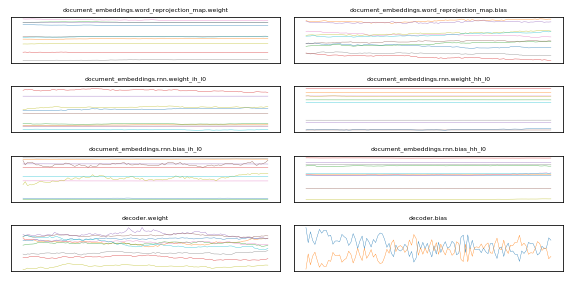

In [15]:
# 8. plot weight traces (optional)
from flair.visual.training_curves import Plotter
plotter = Plotter()
plotter.plot_weights('resources/taggers/ag_news/weights.txt')

In [16]:
classifier = TextClassifier.load('resources/taggers/ag_news/final-model.pt')

# create example sentence
sentence = Sentence('France is the current world cup winner.')

# predict class and print
classifier.predict(sentence)

print(sentence.labels)

2019-11-17 21:55:42,966 loading file resources/taggers/ag_news/final-model.pt
[pos (0.6662055253982544)]


# **Load/Use IMDB-Trained Sentiment Classifier Model**

In [18]:
from flair.data import Sentence
from flair.models import TextClassifier

classifier = TextClassifier.load('/home/prw0007/.flair/models/imdb.pt')

# create example sentence
sentence = Sentence('France is the current world cup winner.')

# predict class and print
classifier.predict(sentence)

print(sentence.labels)

2019-11-17 21:57:26,748 loading file resources/taggers/imdb/final_model.pt


FileNotFoundError: ignored